- https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
- https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

In [1]:
import os, re
curPath = os.getcwd()
match = re.search(pattern=r"^.+?WQD7003_DataAnalytics", string=curPath, flags=re.IGNORECASE)
rootPath = match.group()
os.chdir(rootPath)
os.getcwd()

'd:\\Administration\\Universities\\UniMalaya\\MCS-AC\\WQD7003_DataAnalytics'

In [3]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from imblearn.ensemble import BalancedRandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DataFilePath_1 = "./data/Heart_2022_Encoded_1.csv"
target_classes = ['HadHeartAttack_No','HadHeartAttack_Yes']

In [5]:
df = pd.read_csv(DataFilePath_1)

In [6]:
X = df.drop(columns=['oe_3_2__HadHeartAttack'])
y = df['oe_3_2__HadHeartAttack']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20231231)

# Random Forest Classifier

In [11]:
model = RandomForestClassifier(n_estimators=10,random_state=20231231)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=20231231)

In [12]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [13]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(model.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(model.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      1.00      1.00    218489
HadHeartAttack_Yes       0.99      0.87      0.93     12275

          accuracy                           0.99    230764
         macro avg       0.99      0.93      0.96    230764
      weighted avg       0.99      0.99      0.99    230764

____________________________________________________________
Training set accuracy: 0.9926
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.96      0.99      0.97     93609
HadHeartAttack_Yes       0.53      0.20      0.29      5290

          accuracy                           0.95     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.800


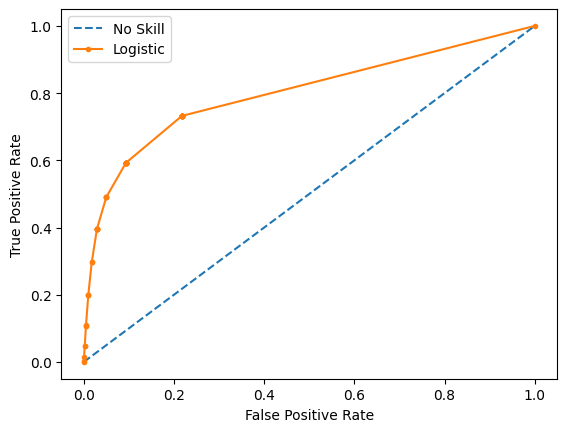

In [14]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

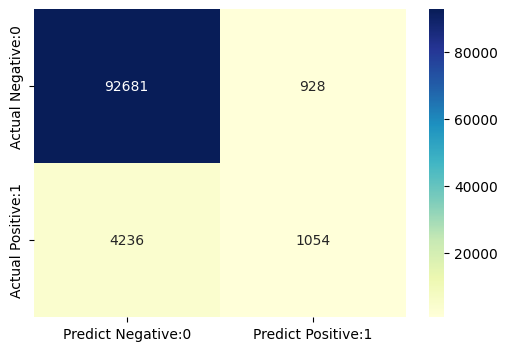

In [15]:
cm = confusion_matrix(y_test,y_test_predict)
# cm
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
                                index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest with Class Weighting

In [16]:
model = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=20231231)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=20231231)

In [17]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [18]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(model.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(model.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      1.00      1.00    218489
HadHeartAttack_Yes       0.99      0.86      0.92     12275

          accuracy                           0.99    230764
         macro avg       0.99      0.93      0.96    230764
      weighted avg       0.99      0.99      0.99    230764

____________________________________________________________
Training set accuracy: 0.9923
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.95      0.99      0.97     93609
HadHeartAttack_Yes       0.52      0.15      0.24      5290

          accuracy                           0.95     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.790


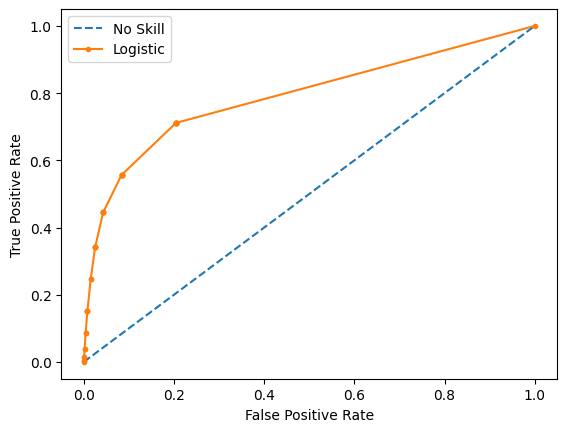

In [19]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Random Forest with Bootstrap Class Weighting

In [20]:
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample',random_state=20231231)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=10,
                       random_state=20231231)

In [21]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [22]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(model.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(model.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.99      1.00      1.00    218489
HadHeartAttack_Yes       0.99      0.86      0.92     12275

          accuracy                           0.99    230764
         macro avg       0.99      0.93      0.96    230764
      weighted avg       0.99      0.99      0.99    230764

____________________________________________________________
Training set accuracy: 0.9922
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.95      0.99      0.97     93609
HadHeartAttack_Yes       0.51      0.16      0.24      5290

          accuracy                           0.95     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.792


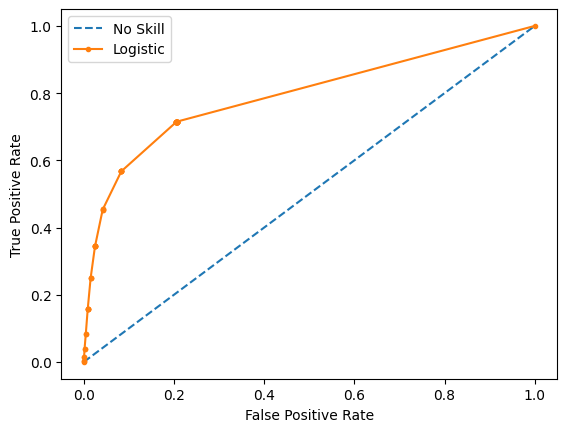

In [23]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Random Forest with Random Undersampling

In [25]:
model = BalancedRandomForestClassifier(n_estimators=10,sampling_strategy='all',replacement=False,random_state=20231231)
model.fit(X_train,y_train)

BalancedRandomForestClassifier(n_estimators=10, random_state=20231231,
                               replacement=False, sampling_strategy='all')

In [26]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [27]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(model.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(model.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       1.00      0.83      0.91    218489
HadHeartAttack_Yes       0.25      0.98      0.40     12275

          accuracy                           0.84    230764
         macro avg       0.62      0.91      0.65    230764
      weighted avg       0.96      0.84      0.88    230764

____________________________________________________________
Training set accuracy: 0.8413
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.82      0.90     93609
HadHeartAttack_Yes       0.19      0.73      0.30      5290

          accuracy                           0.82     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.855


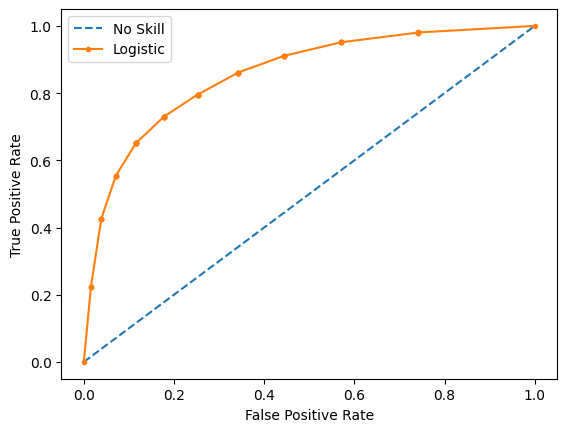

In [28]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()